In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sp = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
sp.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**show the data info**

In [ ]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Encoding**

In [ ]:
Gender = pd.get_dummies(sp['gender'],drop_first=True)

In [ ]:
sp.drop(['gender'],axis=1,inplace=True)

In [ ]:
sp = pd.concat([sp,Gender],axis=1)

In [ ]:
sp.head(10)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,male
0,group B,bachelor's degree,standard,none,72,72,74,False
1,group C,some college,standard,completed,69,90,88,False
2,group B,master's degree,standard,none,90,95,93,False
3,group A,associate's degree,free/reduced,none,47,57,44,True
4,group C,some college,standard,none,76,78,75,True
5,group B,associate's degree,standard,none,71,83,78,False
6,group B,some college,standard,completed,88,95,92,False
7,group B,some college,free/reduced,none,40,43,39,True
8,group D,high school,free/reduced,completed,64,64,67,True
9,group B,high school,free/reduced,none,38,60,50,False


**is there any null values ??**

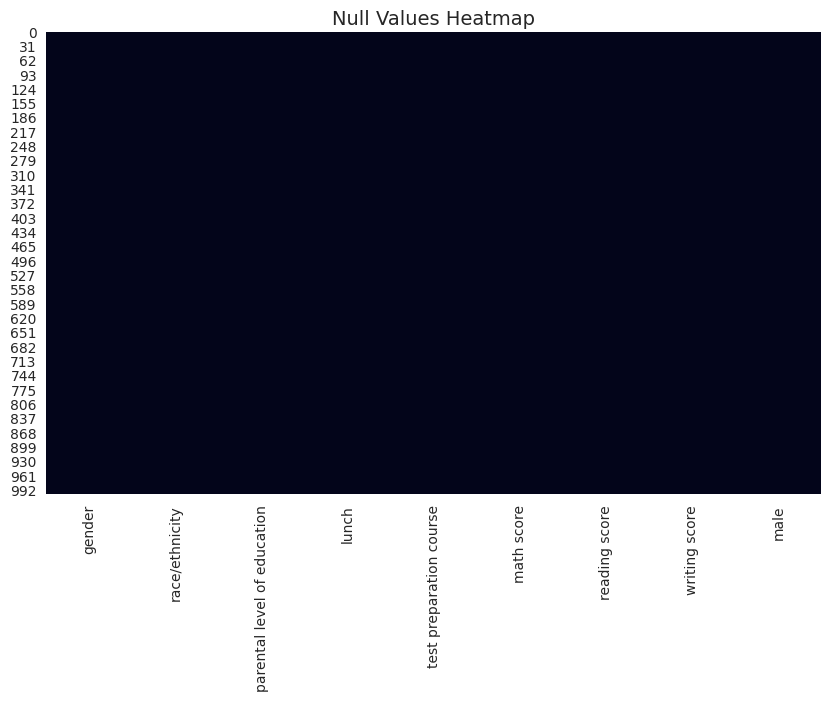

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(sp.isnull(), cbar=False)
plt.title("Null Values Heatmap", fontsize=14)
plt.show()

**Numeric columns heatmap**

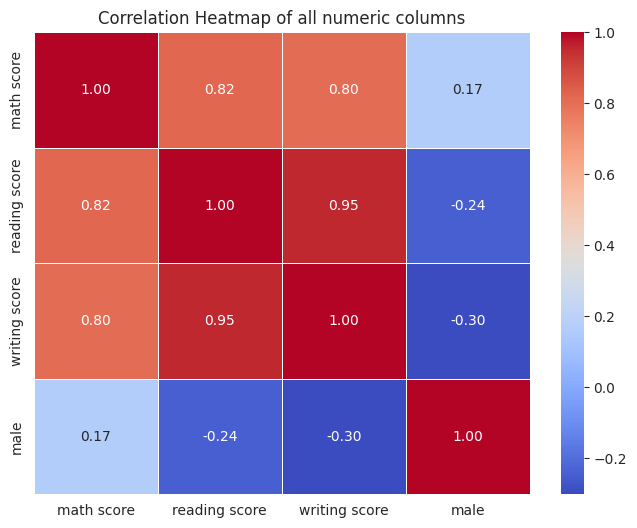

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of all numeric columns")
plt.show()

**Relations graphs**

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

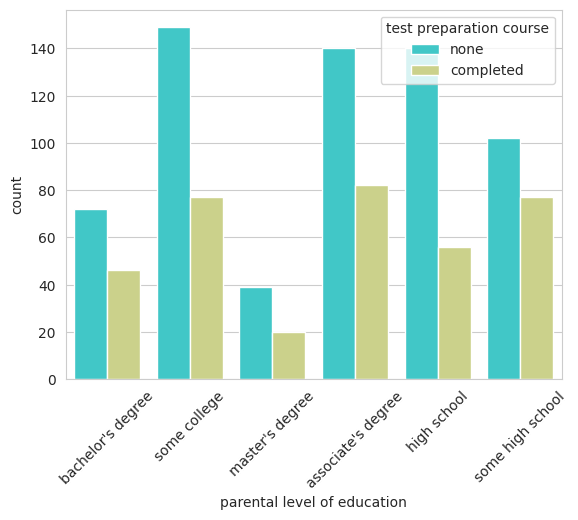

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='parental level of education', hue='test preparation course',data=sp , palette='rainbow')
plt.xticks(rotation=45)

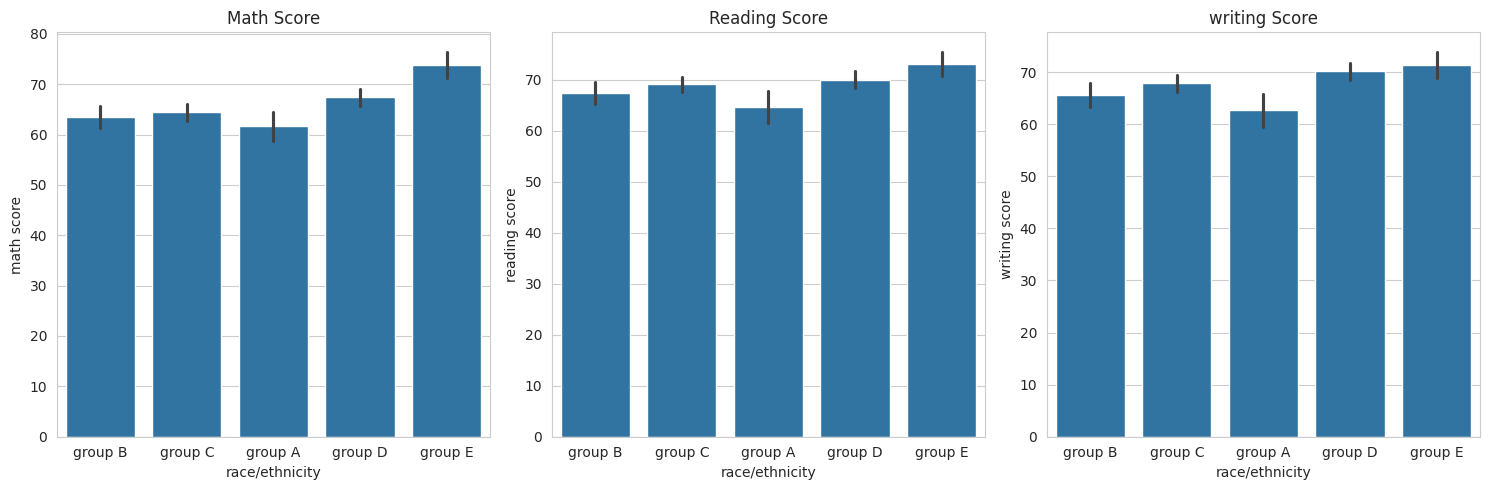

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x='race/ethnicity', y='math score', data=sp, ax=axes[0])
axes[0].set_title('Math Score')
sns.barplot(x='race/ethnicity', y='reading score', data=sp, ax=axes[1])
axes[1].set_title('Reading Score')
sns.barplot(x='race/ethnicity', y='writing score', data=sp, ax=axes[2])
axes[2].set_title('writing Score')

plt.tight_layout()
plt.show()

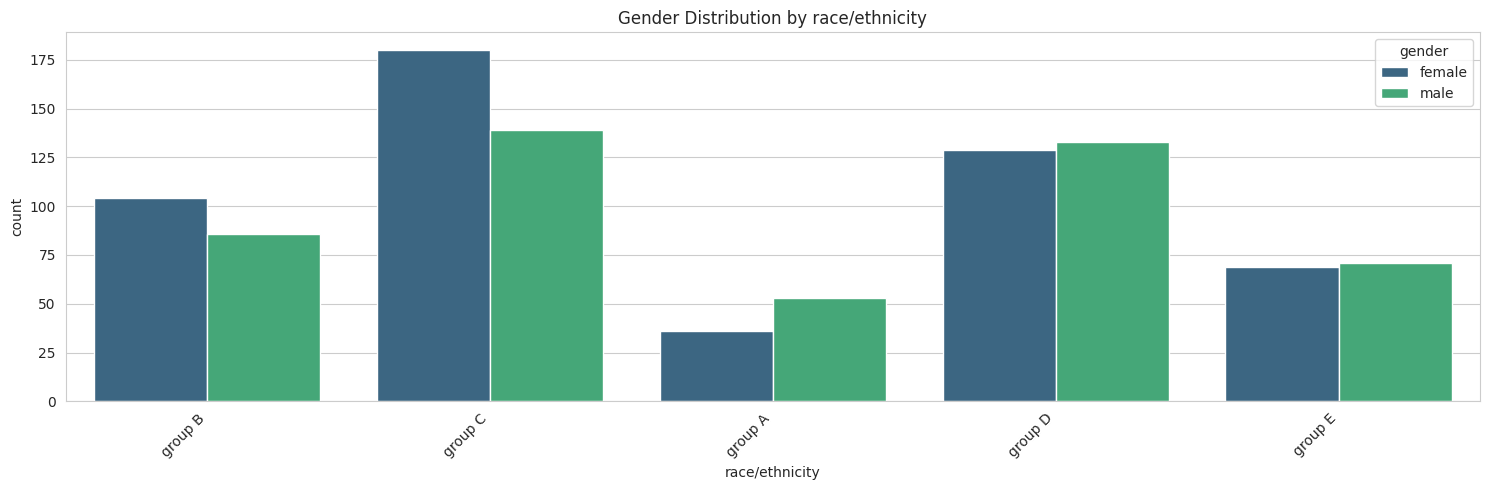

In [ ]:
fig , ax = plt.subplots(1,figsize=(15,5)) # Create a figure and a single Axes object

# Use the original 'gender' column for plotting counts
sns.countplot(x='race/ethnicity', hue='gender', data=sp, ax=ax, palette='viridis')
ax.set_title('Gender Distribution by race/ethnicity')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'group B'),
  Text(1, 0, 'group C'),
  Text(2, 0, 'group A'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

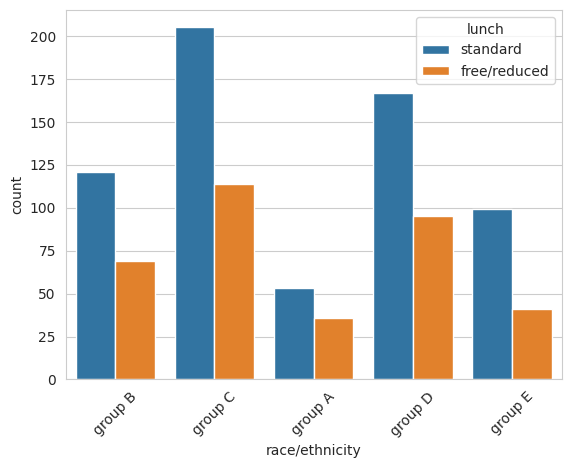

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='race/ethnicity', hue='lunch',data=sp )
plt.xticks(rotation=45)

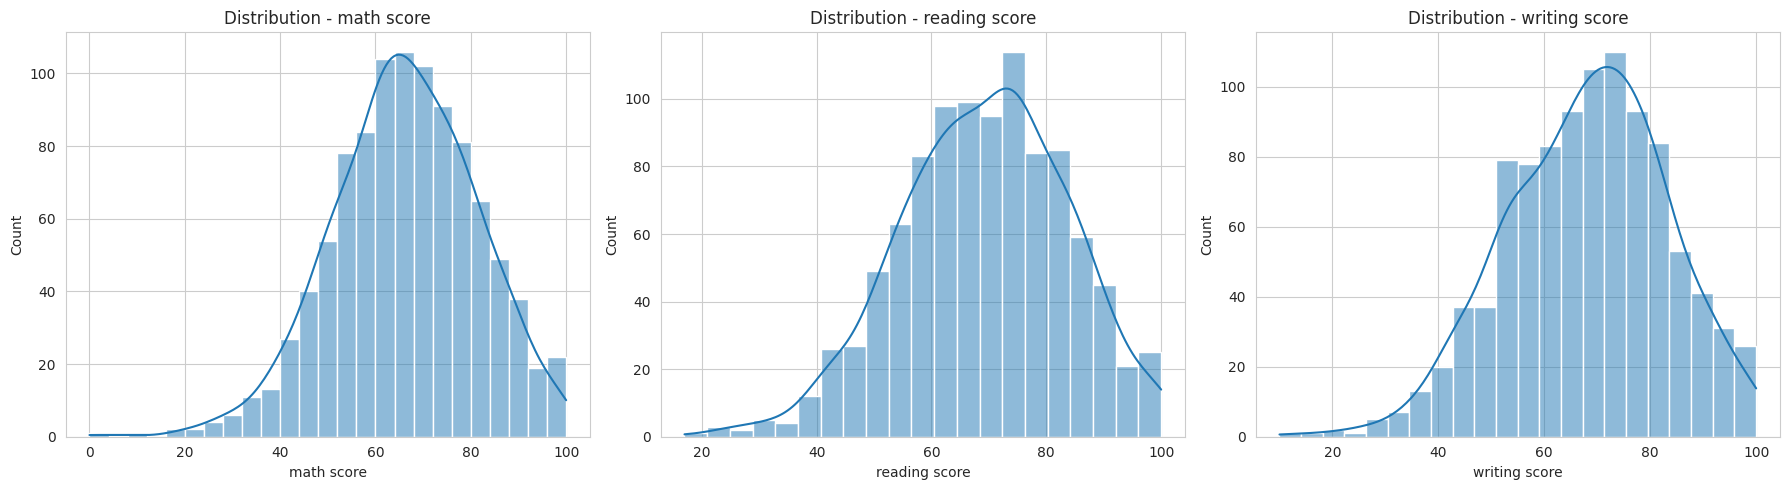

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.histplot(sp['math score'], kde=True, ax=axes[0])
axes[0].set_title('Distribution - math score')
sns.histplot(sp['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Distribution - reading score')
sns.histplot(sp['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Distribution - writing score')
plt.tight_layout()
plt.show()

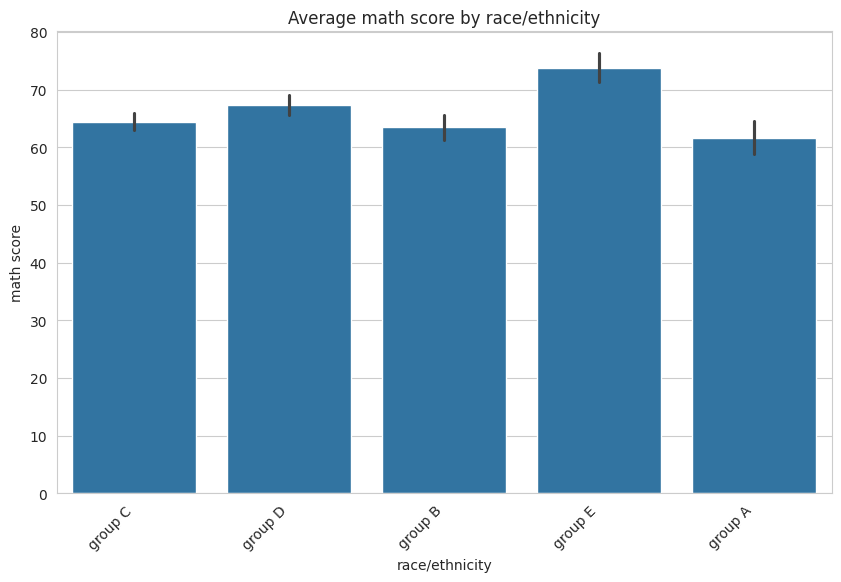

In [ ]:
plt.figure(figsize=(10,6))
order = sp['race/ethnicity'].value_counts().index  # ترتيب حسب التكرار
sns.barplot(data=sp, x='race/ethnicity', y='math score', order=order)
plt.xticks(rotation=45, ha='right')
plt.title('Average math score by race/ethnicity')
plt.show()

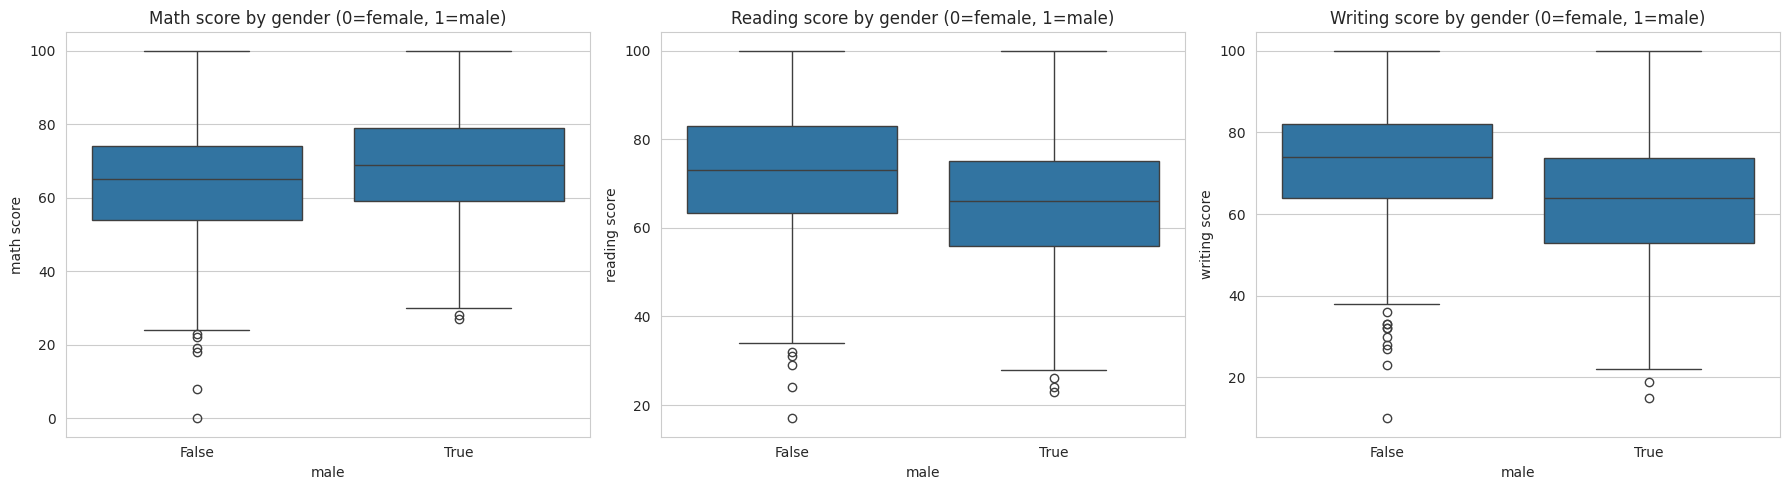

In [ ]:
# Recreate the 'male' column for plotting
sp['male'] = pd.get_dummies(sp['gender'], drop_first=True)

fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='male', y='math score', data=sp, ax=axes[0])
axes[0].set_title('Math score by gender (0=female, 1=male)')
sns.boxplot(x='male', y='reading score', data=sp, ax=axes[1])
axes[1].set_title('Reading score by gender (0=female, 1=male)')
sns.boxplot(x='male', y='writing score', data=sp, ax=axes[2])
axes[2].set_title('Writing score by gender (0=female, 1=male)')
plt.tight_layout()
plt.show()

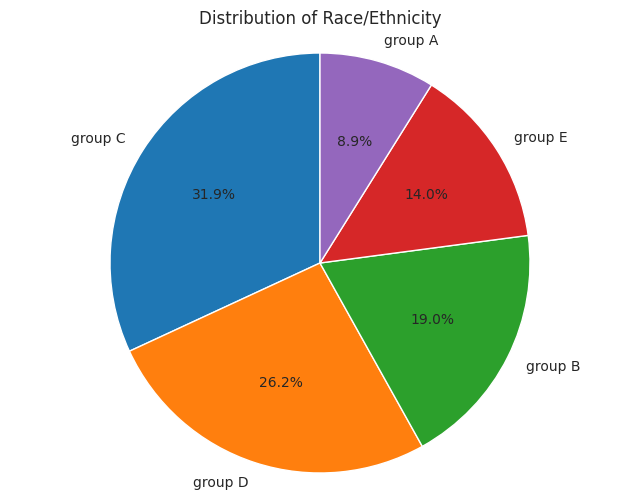

In [ ]:
race_ethnicity_count = sp['race/ethnicity'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(race_ethnicity_count, labels=race_ethnicity_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Race/Ethnicity')
plt.axis('equal')
plt.show()